# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [3]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# 設定 data_path
dir_data = '../data/'

In [5]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [21]:
#1
cut_rule = [-1,1,3,6,app_train['CNT_CHILDREN'].max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, right=False)
app_train['CNT_CHILDREN_GROUP'].value_counts()

[-1, 1)    215371
[1, 3)      87868
[3, 6)       4230
[6, 19)        40
Name: CNT_CHILDREN_GROUP, dtype: int64

In [50]:
#2-1
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
[-1, 1)             0         166747.010980
                    1         160804.210548
[1, 3)              0         174590.584401
                    1         176115.362720
[3, 6)              0         175053.742913
                    1         160677.385714
[6, 19)             0         140879.032258
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
app_train.groupby(["CNT_CHILDREN_GROUP","AMT_INCOME_TOTAL"])["TARGET"].value_counts()

CNT_CHILDREN_GROUP  AMT_INCOME_TOTAL  TARGET
[-1, 1)             25650.0           0           1
                                      1           1
                    26100.0           0           3
                    26460.0           0           1
                    26550.0           0           1
                    27000.0           0          44
                                      1           3
                    27585.0           0           1
                    27900.0           0           5
                    28161.0           0           1
                    28350.0           0          11
                    28404.0           0           1
                    28575.0           0           2
                                      1           1
                    28593.0           0           1
                    28800.0           0           3
                    29133.0           0           1
                    29250.0           0          27
                   

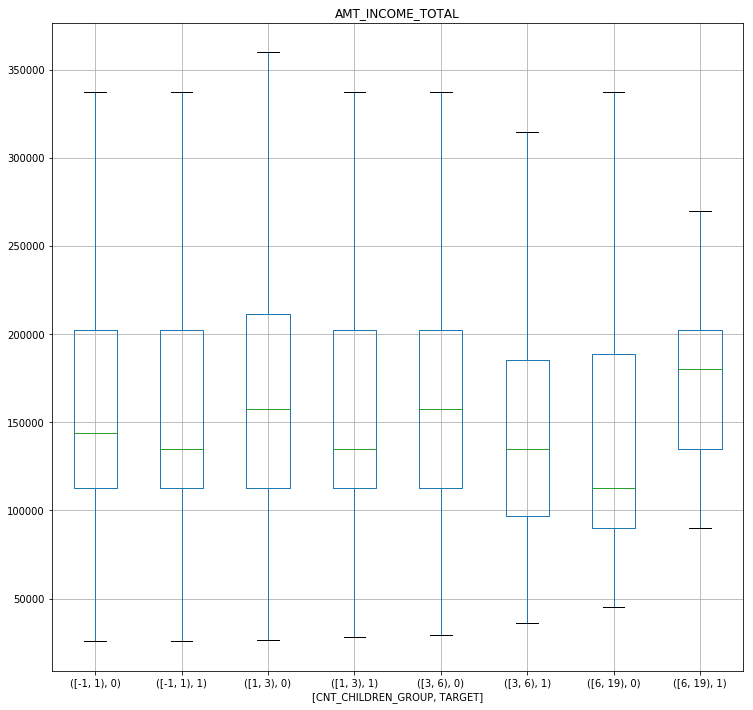

In [35]:
#2-2
plt_column = "AMT_INCOME_TOTAL"
plt_by = grp

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [51]:
#3

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean()) / x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
